![Header Image](header.png)

# Job Horizon
### Skill-Based Job Matching for Career Development
---

#### **Welcome to Job Horizon!** This project was created as part of an internship with Tech Mahindra in Oman. Our goal is to support job seekers in the region by identifying skill gaps and recommending job opportunities that best match their qualifications.

###### **Project Overview**
Due to the growing number of job seekers, Job Horizon aims to help users align their skills with available job opportunities. Here’s how it works:
1. **Dataset Preparation:** We use job data from Kaggle (https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset), containing job roles and skill requirements, to create an analytical foundation.
2. **Dataset Analysis:** By analyzing the job dataset, we gain insights into skill requirements and how best to structure our matching approach.
3. **User Data Entry:** Users can input their details, including course names, grades, major, and skills. This information is stored for analysis.
4. **Job Matching and Recommendations:** The code then compares user data with job requirements, generating personalized job recommendations based on suitability and highlighting skill areas for improvement.
5. **AI-Based Job Recommendation System**: This step integrates AI to enhance job matching by evaluating user inputs through skill matching, similarity scoring, and organized job displays.

This notebook will guide you through each step, from data preparation and analysis to final recommendations.

---

## 1. Dataset Preparation
---

Import necessary libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# User Interface and Widgets
import ipywidgets as widgets
from IPython.display import display, clear_output

# AI libraries: 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import PyPDF2

Load the dataset

In [2]:
# Define file path
file_path = "job_descriptions.csv"

# Load the rows
data = pd.read_csv(file_path)

# Display the first few rows to check the data
print("Dataset Preview:")
data.head(3)

Dataset Preview:


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."


Or you can use this code to downlod the data:
---
  
import kagglehub

//Download latest version

path = kagglehub.dataset_download("ravindrasinghrana/job-description-dataset")

print("Path to dataset files:", path)

---

Basic dataset information

In [3]:
# Shows column names, data types, and non-null counts
print("Dataset Information:")
print(data.info()) 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 no

Shape of the dataset

In [4]:
print("\nNumber of rows and columns:")
print(data.shape)  # (rows, columns)


Number of rows and columns:
(1615940, 23)


Column names

In [5]:
print("\nColumn Names:")
print(data.columns.tolist())


Column Names:
['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location', 'Country', 'latitude', 'longitude', 'Work Type', 'Company Size', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile']


Descriptive statistics for numerical columns

In [6]:
print("\nDescriptive Statistics:")
print(data.describe())  # Shows count, mean, std, min, max for numerical data


Descriptive Statistics:
             Job Id      latitude     longitude  Company Size
count  1.615940e+06  1.615940e+06  1.615940e+06  1.615940e+06
mean   1.548935e+15  1.937743e+01  1.639926e+01  7.370467e+04
std    8.946722e+14  2.355690e+01  7.066762e+01  3.529886e+04
min    1.817948e+11 -4.090060e+01 -1.751982e+02  1.264600e+04
25%    7.740508e+14  5.152100e+00 -1.531010e+01  4.311400e+04
50%    1.547858e+15  1.807080e+01  1.914510e+01  7.363300e+04
75%    2.323729e+15  3.907420e+01  4.757690e+01  1.043000e+05
max    3.099618e+15  7.170690e+01  1.780650e+02  1.348340e+05


Checking for missing values

In [7]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64


Display unique values in each column

In [8]:
print("\nUnique Values in Each Column:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")


Unique Values in Each Column:
Job Id: 1615940 unique values
Experience: 48 unique values
Qualifications: 10 unique values
Salary Range: 561 unique values
location: 214 unique values
Country: 216 unique values
latitude: 216 unique values
longitude: 216 unique values
Work Type: 5 unique values
Company Size: 122188 unique values
Job Posting Date: 731 unique values
Preference: 3 unique values
Contact Person: 367128 unique values
Contact: 1615933 unique values
Job Title: 147 unique values
Role: 376 unique values
Job Portal: 16 unique values
Job Description: 376 unique values
Benefits: 11 unique values
skills: 376 unique values
Responsibilities: 375 unique values
Company: 888 unique values
Company Profile: 884 unique values


Select the relevant columns to our project idea:

In [9]:
# Selecting and renaming columns
selected_columns = {
    'Job Id': 'Job_ID',
    'Job Title': 'Job_Title',
    'Role': 'Role_Specialization',
    'Experience': 'Experience_Required',
    'Qualifications': 'Required_Qualifications',
    'Salary Range': 'Salary_Range',
    'Job Description': 'Job_Description',
    'skills': 'Required_Skills',
    'Responsibilities': 'Job_Responsibilities',
    'Company': 'Company_Name',
    'Company Profile': 'Company_Profile'
}

# Filter and rename the dataset
data_selected = data[list(selected_columns.keys())].rename(columns=selected_columns)

# Preview the updated dataset
print("Selected and Renamed Dataset Preview:")
data_selected.head()

Selected and Renamed Dataset Preview:


,Job_ID,Job_Title,Role_Specialization,Experience_Required,Required_Qualifications,Salary_Range,Job_Description,Required_Skills,Job_Responsibilities,Company_Name,Company_Profile
0,1089843540111562,Digital Marketing Specialist,Social Media Manager,5 to 15 Years,M.Tech,$59K-$99K,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,Web Developer,Frontend Web Developer,2 to 12 Years,BCA,$56K-$116K,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,Operations Manager,Quality Control Manager,0 to 12 Years,PhD,$61K-$104K,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,Network Engineer,Wireless Network Engineer,4 to 11 Years,PhD,$65K-$91K,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,Event Manager,Conference Manager,1 to 12 Years,MBA,$64K-$87K,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


Prepare the Experience_Required column

In [10]:
# Split the 'Experience' column into 'Min_Experience' and 'Max_Experience'
experience_split = data_selected['Experience_Required'].str.split(' to ', expand=True)

# Convert the split values to numeric (you may need to handle cases without a number)
data_selected['Min_Years_of_Required_Experience'] = pd.to_numeric(experience_split[0].str.replace(' Years', '').str.strip(), errors='coerce')
data_selected['Max_Years_of_Required_Experience'] = pd.to_numeric(experience_split[1].str.replace(' Years', '').str.strip(), errors='coerce')

# Drop the original 'Experience' column
data_selected = data_selected.drop(columns=['Experience_Required'])

# Preview the updated dataset to confirm changes
print("Updated Dataset Preview:")
data_selected.head()

Updated Dataset Preview:


,Job_ID,Job_Title,Role_Specialization,Required_Qualifications,Salary_Range,Job_Description,Required_Skills,Job_Responsibilities,Company_Name,Company_Profile,Min_Years_of_Required_Experience,Max_Years_of_Required_Experience
0,1089843540111562,Digital Marketing Specialist,Social Media Manager,M.Tech,$59K-$99K,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",5,15
1,398454096642776,Web Developer,Frontend Web Developer,BCA,$56K-$116K,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",2,12
2,481640072963533,Operations Manager,Quality Control Manager,PhD,$61K-$104K,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",0,12
3,688192671473044,Network Engineer,Wireless Network Engineer,PhD,$65K-$91K,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",4,11
4,117057806156508,Event Manager,Conference Manager,MBA,$64K-$87K,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",1,12


Prepare the Required_Qualifications column

In [11]:
# Rename Required_Qualifications data for more clarification 
data_selected['Required_Qualifications'] = data_selected['Required_Qualifications'].replace({
    'M.Tech': 'Master of Technology',
    'BCA': 'Bachelor of Computer Applications',
    'PhD': 'Doctor of Philosophy',
    'MBA': 'Master of Business Administration',
    'MCA': 'Master of Computer Applications',
    'M.Com': 'Master of Commerce',
    'BBA': 'Bachelor of Business Administration',
    'B.Tech': 'Bachelor of Technology',
    'B.Com': 'Bachelor of Commerce',
    'BA': 'Bachelor of Arts'
})

data_selected.head()

,Job_ID,Job_Title,Role_Specialization,Required_Qualifications,Salary_Range,Job_Description,Required_Skills,Job_Responsibilities,Company_Name,Company_Profile,Min_Years_of_Required_Experience,Max_Years_of_Required_Experience
0,1089843540111562,Digital Marketing Specialist,Social Media Manager,Master of Technology,$59K-$99K,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",5,15
1,398454096642776,Web Developer,Frontend Web Developer,Bachelor of Computer Applications,$56K-$116K,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",2,12
2,481640072963533,Operations Manager,Quality Control Manager,Doctor of Philosophy,$61K-$104K,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",0,12
3,688192671473044,Network Engineer,Wireless Network Engineer,Doctor of Philosophy,$65K-$91K,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",4,11
4,117057806156508,Event Manager,Conference Manager,Master of Business Administration,$64K-$87K,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",1,12


Prepare the Salary_Range column

In [12]:
# Split Salary_Range into Salary_Min and Salary_Max
data_selected[['Salary_Min', 'Salary_Max']] = data_selected['Salary_Range'].str.extract(r'(\d+)(?:\D+)(\d+)')

# Convert Salary_Min and Salary_Max to numeric values
data_selected['Salary_Min'] = data_selected['Salary_Min'].astype(int) * 1000
data_selected['Salary_Max'] = data_selected['Salary_Max'].astype(int) * 1000

# Remove the original Salary_Range column
data_selected.drop(columns=['Salary_Range'], inplace=True)

# Rename columns for clarity and add unit notes
data_selected.rename(columns={
    'Salary_Min': 'Min_Salary_in_$_per_year',
    'Salary_Max': 'Max_Salary_in_$_per_year'
}, inplace=True)

data_selected.head()

,Job_ID,Job_Title,Role_Specialization,Required_Qualifications,Job_Description,Required_Skills,Job_Responsibilities,Company_Name,Company_Profile,Min_Years_of_Required_Experience,Max_Years_of_Required_Experience,Min_Salary_in_$_per_year,Max_Salary_in_$_per_year
0,1089843540111562,Digital Marketing Specialist,Social Media Manager,Master of Technology,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",5,15,59000,99000
1,398454096642776,Web Developer,Frontend Web Developer,Bachelor of Computer Applications,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",2,12,56000,116000
2,481640072963533,Operations Manager,Quality Control Manager,Doctor of Philosophy,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",0,12,61000,104000
3,688192671473044,Network Engineer,Wireless Network Engineer,Doctor of Philosophy,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",4,11,65000,91000
4,117057806156508,Event Manager,Conference Manager,Master of Business Administration,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",1,12,64000,87000


Re-order the columns

In [13]:
# Define the desired order of columns
new_column_order = [
    'Job_ID',
    'Job_Title',
    'Role_Specialization',
    'Required_Qualifications',
    'Min_Years_of_Required_Experience',
    'Max_Years_of_Required_Experience',
    'Min_Salary_in_$_per_year',
    'Max_Salary_in_$_per_year',
    'Job_Description',
    'Required_Skills',
    'Job_Responsibilities',
    'Company_Name',
    'Company_Profile'
]

# Reorder the DataFrame using the new column order
data_selected = data_selected[new_column_order]

# Preview the reordered dataset
print("Reordered Dataset Preview:")
data_selected.head()


Reordered Dataset Preview:


,Job_ID,Job_Title,Role_Specialization,Required_Qualifications,Min_Years_of_Required_Experience,Max_Years_of_Required_Experience,Min_Salary_in_$_per_year,Max_Salary_in_$_per_year,Job_Description,Required_Skills,Job_Responsibilities,Company_Name,Company_Profile
0,1089843540111562,Digital Marketing Specialist,Social Media Manager,Master of Technology,5,15,59000,99000,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,Web Developer,Frontend Web Developer,Bachelor of Computer Applications,2,12,56000,116000,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,Operations Manager,Quality Control Manager,Doctor of Philosophy,0,12,61000,104000,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,Network Engineer,Wireless Network Engineer,Doctor of Philosophy,4,11,65000,91000,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,Event Manager,Conference Manager,Master of Business Administration,1,12,64000,87000,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


Save the ready dataset to a new csv file

In [14]:
# Save the processed data to a new CSV file
data_selected.to_csv('ReadyToUse_dataset.csv', index=False)

data

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,134563577088850,0 to 12 Years,B.Tech,$64K-$114K,"Malabo (de jure),",Equatorial Guinea,1.6508,10.2679,Full-Time,18281,...,950-451-5843,Mechanical Engineer,Mechanical Design Engineer,ZipRecruiter,Mechanical Design Engineers create and develop...,"{'Employee Assistance Programs (EAP), Tuition ...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",The Hershey Company,"{""Sector"":""Food and Beverage/Confectionery"",""I..."
1615936,618604818190827,2 to 14 Years,M.Tech,$62K-$130K,Warsaw,Poland,51.9194,19.1451,Intern,63621,...,676.387.1572x71877,IT Manager,IT Director,USAJOBS,An IT Director oversees an organizations IT de...,"{'Health Insurance, Retirement Plans, Paid Tim...",Strategic IT planning Leadership and managemen...,Provide strategic leadership for IT department...,EQT,"{""Sector"":""Energy"",""Industry"":""Energy"",""City"":..."
1615937,615471367712200,4 to 15 Years,BCA,$60K-$96K,Ashgabat,Turkmenistan,38.9697,59.5563,Part-Time,114287,...,537.384.6193x5284,Mechanical Engineer,Mechanical Design Engineer,Indeed,Mechanical Design Engineers create and develop...,"{'Tuition Reimbursement, Stock Options or Equi...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",KLA,"{""Sector"":""Technology"",""Industry"":""Semiconduct..."
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burk

Now the dataset is prepared to start analysing it

---
## 2. Dataset Analysis
---

Read the prepares dataset file

In [15]:
# Define prepared csv file path
file_path = "ReadyToUse_dataset.csv"

# Load the rows
dataset = pd.read_csv(file_path)

dataset.head()

,Job_ID,Job_Title,Role_Specialization,Required_Qualifications,Min_Years_of_Required_Experience,Max_Years_of_Required_Experience,Min_Salary_in_$_per_year,Max_Salary_in_$_per_year,Job_Description,Required_Skills,Job_Responsibilities,Company_Name,Company_Profile
0,1089843540111562,Digital Marketing Specialist,Social Media Manager,Master of Technology,5,15,59000,99000,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,Web Developer,Frontend Web Developer,Bachelor of Computer Applications,2,12,56000,116000,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,Operations Manager,Quality Control Manager,Doctor of Philosophy,0,12,61000,104000,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,Network Engineer,Wireless Network Engineer,Doctor of Philosophy,4,11,65000,91000,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,Event Manager,Conference Manager,Master of Business Administration,1,12,64000,87000,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


Generating basic summary statistics about the dataset

In [16]:
# Generate summary statistics
dataset.describe()

,Job_ID,Min_Years_of_Required_Experience,Max_Years_of_Required_Experience,Min_Salary_in_$_per_year,Max_Salary_in_$_per_year
count,1.615940e+06,1.615940e+06,1.615940e+06,1.615940e+06,1.615940e+06
mean,1.548935e+15,2.501808e+00,1.149798e+01,6.000343e+04,1.049789e+05
std,8.946722e+14,1.707809e+00,2.291933e+00,3.163964e+03,1.471749e+04
min,1.817948e+11,0.000000e+00,8.000000e+00,5.500000e+04,8.000000e+04
25%,7.740508e+14,1.000000e+00,9.000000e+00,5.700000e+04,9.200000e+04
50%,1.547858e+15,3.000000e+00,1.100000e+01,6.000000e+04,1.050000e+05
75%,2.323729e+15,4.000000e+00,1.300000e+01,6.300000e+04,1.180000e+05
max,3.099618e+15,5.000000e+00,1.500000e+01,6.500000e+04,1.300000e+05


Count of Job Titles: Analyze the frequency of different job titles in the dataset

In [17]:
# Count of job titles
dataset['Job_Title'].value_counts()

UX/UI Designer                  48551
Digital Marketing Specialist    27975
Software Engineer               27630
Network Engineer                24393
Software Tester                 20945
                                ...  
Personal Assistant               3441
QA Engineer                      3439
Procurement Coordinator          3424
Key Account Manager              3411
Inventory Analyst                3342
Name: Job_Title, Length: 147, dtype: int64

Salary Distribution: visualize the distribution of salaries

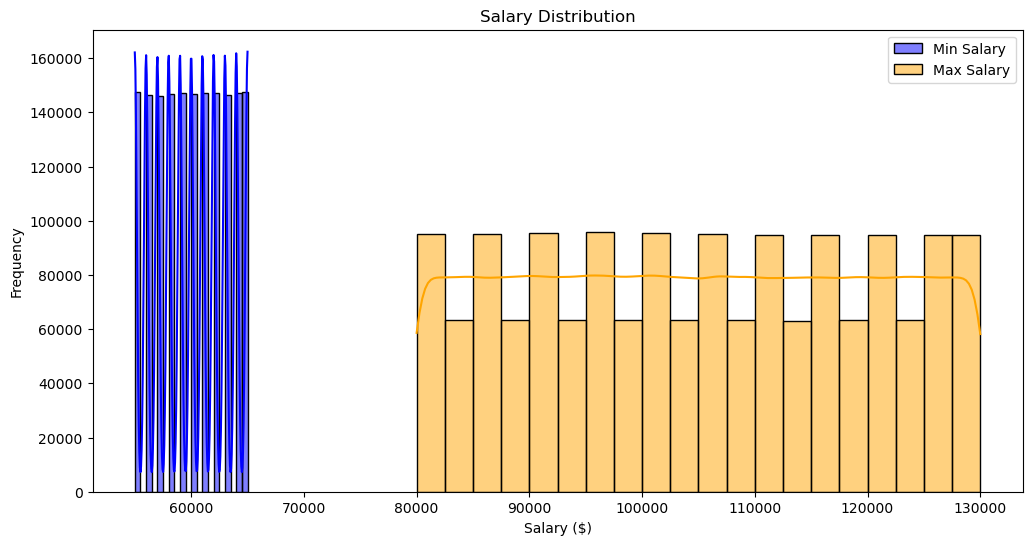

In [18]:
# Visualize the salary distribution
plt.figure(figsize=(12, 6))
sns.histplot(dataset['Min_Salary_in_$_per_year'], bins=20, kde=True, color='blue', label='Min Salary')
sns.histplot(dataset['Max_Salary_in_$_per_year'], bins=20, kde=True, color='orange', label='Max Salary')
plt.title('Salary Distribution')
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Experience vs. Salary: Visualizing the relationship between years of experience and salary

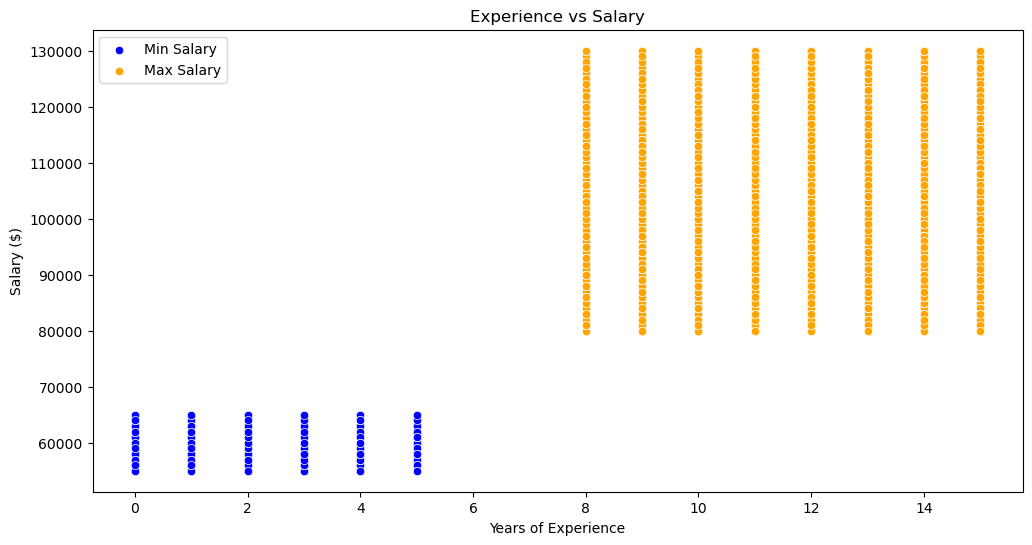

In [19]:
# Scatter plot for Experience vs. Salary
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataset, x='Min_Years_of_Required_Experience', y='Min_Salary_in_$_per_year', color='blue', label='Min Salary')
sns.scatterplot(data=dataset, x='Max_Years_of_Required_Experience', y='Max_Salary_in_$_per_year', color='orange', label='Max Salary')
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.legend()
plt.show()

Top Companies: Identify the companies that have the most job postings

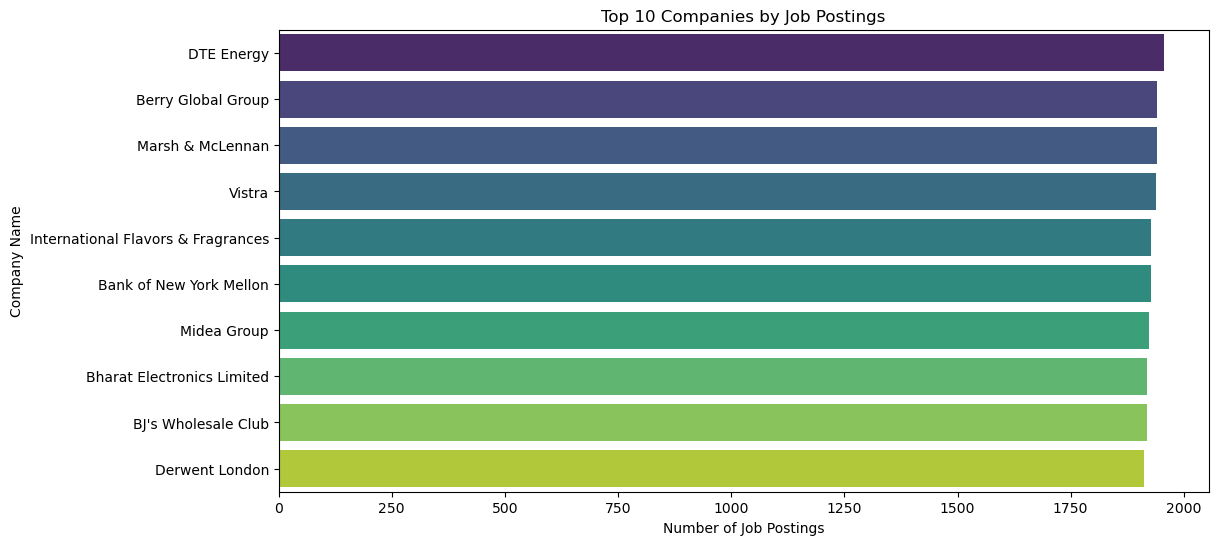

In [20]:
# Count of job postings per company
top_companies = dataset['Company_Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')
plt.title('Top 10 Companies by Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.show()

Role Specialization Distribution: Analyze how many jobs fall under different role specializations

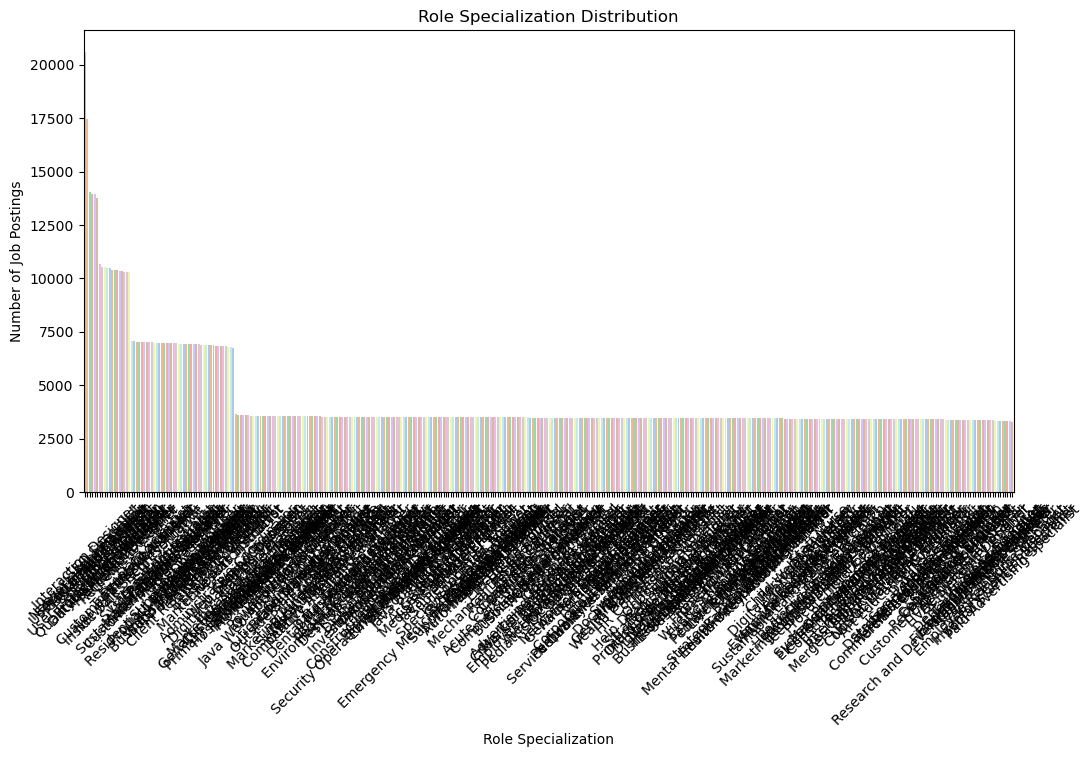

In [21]:
# Count of roles
role_counts = dataset['Role_Specialization'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=role_counts.index, y=role_counts.values, palette='pastel')
plt.title('Role Specialization Distribution')
plt.xlabel('Role Specialization')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

Now, the jobs dataset is ready to use. Therefore, we can move to the user data.

---
## 3. User Data Entry
---

DataFrame Initialization: start with an empty DataFrame to store user entries

In [22]:
user_data = pd.DataFrame(columns=['Course Name', 'Grade (on a 4.0 scale)', 'Major', 'Skills (comma-separated if multiple)'])

Function to capitalize the first letter of each word

In [23]:
def capitalize_words(text):
    return ' '.join(word.capitalize() for word in text.split())

Input Widgets: create input fields for course name, grade, major, and skills using the widgets library

In [24]:
course_name = widgets.Text(description="Course Name:")
grade = widgets.FloatText(description="Grade (4.0 scale):")
major = widgets.Text(description="Major:")
skills = widgets.Text(description="Skills:")

Add Entry Button: define a button that users can click to add their entries to the DataFrame

In [25]:
add_button = widgets.Button(description="Add")

delete Button: define a button that users can click to delete their last entry from the DataFrame

In [26]:
delete_button = widgets.Button(description="Delete")

save Button: define a button that users can click to save his entries

In [27]:
save_button = widgets.Button(description="Save to CSV")

Output Area: An output widget to display the current state of the user_data DataFrame

In [28]:
output = widgets.Output()

Function to Add Data: The add_entry function is defined to append new entries to the DataFrame and display the updated DataFrame

In [29]:
# Function to Add Data
def add_entry(b):
    global user_data
    if not course_name.value:
        with output:
            clear_output()
            print("Please enter a valid Course Name.")
        return
    formatted_course_name = capitalize_words(course_name.value)
    
    if grade.value < 0 or grade.value > 4:
        with output:
            clear_output()
            print("Please enter a valid grade between 0 and 4.")
        return

    if not major.value:
        with output:
            clear_output()
            print("Please enter a valid Major.")
        return
    formatted_major = capitalize_words(major.value)

    if not skills.value:
        with output:
            clear_output()
            print("Please enter at least one skill.")
        return
    formatted_skills = ', '.join(skill.strip().lower() for skill in skills.value.split(',') if skill.strip())

    new_entry = {
        "Course Name": formatted_course_name,
        "Grade (on a 4.0 scale)": grade.value,
        "Major": formatted_major,
        "Skills (comma-separated if multiple)": formatted_skills
    }
    user_data.loc[len(user_data)] = new_entry
    course_name.value = ''
    grade.value = 0.0
    major.value = ''
    skills.value = ''
    with output:
        clear_output()
        display(user_data)

Function to delete the last entry

In [30]:
def delete_last_entry(b):
    global user_data
    if len(user_data) > 0:
        user_data.drop(user_data.index[-1], inplace=True)
        user_data.reset_index(drop=True, inplace=True)
        with output:
            clear_output()
            display(user_data)
    else:
        with output:
            clear_output()
            print("No entries to delete.")

Function to save the DataFrame to CSV

In [31]:
def save_to_csv(b):
    if len(user_data) > 0:
        user_data.to_csv('user_data.csv', index=False)
        with output:
            clear_output()
            print("Data saved to 'user_data.csv'.")
    else:
        with output:
            clear_output()
            print("No data to save.")

Link the buttons to their respective functions

In [32]:
add_button.on_click(add_entry)
delete_button.on_click(delete_last_entry)
save_button.on_click(save_to_csv)

Display Widgets: Finally, you display all the widgets to the user

In [33]:
display(course_name, grade, major, skills, add_button, delete_button, save_button, output)

Text(value='', description='Course Name:')

FloatText(value=0.0, description='Grade (4.0 scale):')

Text(value='', description='Major:')

Text(value='', description='Skills:')

Button(description='Add', style=ButtonStyle())

Button(description='Delete', style=ButtonStyle())

Button(description='Save to CSV', style=ButtonStyle())

Output()

Now user data is ready to applay the job matching

---
## 4. Job Matching and Recommendations
---

User dataset

In [36]:
user_data

,Course Name,Grade (on a 4.0 scale),Major,Skills (comma-separated if multiple),Skills List
0,Digital Marketing,3.5,Marketing,"social media platforms, content creation, adve...",NaN
1,Web Development,3.7,Computer Science,"html, css, javascript, frontend frameworks",NaN
2,Quality Control,3.6,Operations Management,"quality control, process improvement, safety s...",NaN
3,Wireless Networks,3.8,Network Engineering,"wi-fi, wireless design, network optimization",NaN
4,Sql Databases,3.9,Computer Applications,"sql, database design, data management",NaN


Load the Job Dataset

In [37]:
# Load job listings dataset
job_data = pd.read_csv("ReadyToUse_dataset.csv")
# for time saving we wil copy only the first 100 job and applay the matching on them
job_data_100 = job_data.head(100)
job_data_100.head(2)

,Job_ID,Job_Title,Role_Specialization,Required_Qualifications,Min_Years_of_Required_Experience,Max_Years_of_Required_Experience,Min_Salary_in_$_per_year,Max_Salary_in_$_per_year,Job_Description,Required_Skills,Job_Responsibilities,Company_Name,Company_Profile
0,1089843540111562,Digital Marketing Specialist,Social Media Manager,Master of Technology,5,15,59000,99000,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,Web Developer,Frontend Web Developer,Bachelor of Computer Applications,2,12,56000,116000,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."


Define the Job Matching Function

In [38]:
def match_jobs(user_data, job_data):
    # Create a copy of job_data to avoid SettingWithCopyWarning
    job_data = job_data.copy()
    
    # Preprocess job skills into sets for efficient lookup
    job_data['Required_Skills_Set'] = job_data['Required_Skills'].apply(lambda x: set(x.lower().replace(" ", "").split(',')))

    # Initialize an empty DataFrame for recommendations
    recommendations = pd.DataFrame()

    # Iterate over user data entries
    for _, user in user_data.iterrows():
        user_skills = set(user['Skills (comma-separated if multiple)'].lower().replace(" ", "").split(','))
        user_course_name = user['Course Name'].lower().strip()
        user_major = user['Major'].lower().strip()
        
        # Apply filtering conditions to find matching jobs
        matched_jobs = job_data[
            job_data['Required_Skills_Set'].apply(lambda skills: bool(user_skills & skills)) | # Skill overlap
            job_data['Job_Title'].str.lower().str.contains(user_course_name) | # Course name in job title
            job_data['Role_Specialization'].str.lower().str.contains(user_major) # Major in specialization
        ]
        
        # Append matched jobs to recommendations
        recommendations = pd.concat([recommendations, matched_jobs], ignore_index=True)

    # Drop duplicate job recommendations if needed
    recommendations.drop_duplicates(subset=['Job_ID'], inplace=True)
    return recommendations.drop(columns='Required_Skills_Set')  # Drop helper column before returning


Generate Recommendations

In [39]:
# Generate job recommendations
job_recommendations = match_jobs(user_data, job_data_100)

# Display recommendations
if not job_recommendations.empty:
    print("Job Recommendations:")
    display(job_recommendations)
else:
    print("No job matches found based on the user data.")

Job Recommendations:


,Job_ID,Job_Title,Role_Specialization,Required_Qualifications,Min_Years_of_Required_Experience,Max_Years_of_Required_Experience,Min_Salary_in_$_per_year,Max_Salary_in_$_per_year,Job_Description,Required_Skills,Job_Responsibilities,Company_Name,Company_Profile
0,1089843540111562,Digital Marketing Specialist,Social Media Manager,Master of Technology,5,15,59000,99000,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,1887042790868742,Digital Marketing Specialist,Social Media Manager,Doctor of Philosophy,0,10,65000,95000,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Renishaw,"{""Sector"":""Manufacturing"",""Industry"":""Engineer..."
2,398454096642776,Web Developer,Frontend Web Developer,Bachelor of Computer Applications,2,12,56000,116000,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
3,1355325262915901,UI Developer,Front-End Developer,Bachelor of Business Administration,2,10,65000,119000,A Front-End Developer specializes in creating ...,"Front-end web development HTML, CSS, JavaScrip...",Develop and maintain user interfaces for websi...,Bodycote,"{""Sector"":""Engineering"",""Industry"":""Manufactur..."


In [40]:
#Save results:
job_recommendations.to_csv('job_recommendations.csv', index=False)

In [41]:
job_recommendations.shape

(4, 13)

### Skill Gap Analysis
Identify skills that the user has and skills that are commonly required for the jobs they are interested in but are missing. This could help users understand what additional skills they need to acquire.

In [42]:
def skill_gap_analysis(user_data, job_recommendations):
    all_required_skills = set()
    
    # Aggregate all required skills from job recommendations
    for skills in job_recommendations['Required_Skills']:
        all_required_skills.update(set(skills.lower().replace(" ", "").split(',')))
    
    # Get user skills
    user_skills = set(user_data['Skills (comma-separated if multiple)'].str.cat(sep=',').lower().replace(" ", "").split(','))
    
    # Identify missing skills
    missing_skills = all_required_skills - user_skills
    
    return missing_skills

### Skill Development Recommendations:
After identifying the skill gaps, suggest online courses, tutorials, or resources that can help users learn these skills.

In [43]:
def suggest_courses(missing_skills):
    # Placeholder for course recommendations
    course_resources = {
        'socialmedia': 'Coursera: Social Media Marketing',
        'html': 'W3Schools: HTML Tutorial',
        'css': 'Codecademy: Learn CSS',
        'javascript': 'freeCodeCamp: JavaScript Algorithms and Data Structures',
        'sql': 'Udacity: SQL for Data Analysis',
        'angular': 'Coursera: Angular - The Complete Guide',
        'react': 'Codecademy: Learn React',
        'wirelessnetworking': 'LinkedIn Learning: Wireless Networking',
        # Add more mappings as needed
    }
    
    # Create recommendations based on missing skills
    recommendations = {}
    for skill in missing_skills:
        normalized_skill = ''.join(skill.split())  # Remove spaces for matching
        recommendations[skill] = course_resources.get(normalized_skill, 'No course available')
        
    return recommendations

Integrate the skill gap analysis and suggestions for additional skills

In [44]:
# After generating job recommendations
job_recommendations = match_jobs(user_data, job_data_100)

if not job_recommendations.empty:
    print("Job Recommendations:")
    display(job_recommendations)
    
    # Perform skill gap analysis
    missing_skills = skill_gap_analysis(user_data, job_recommendations)
    
    if missing_skills:
        print("Missing Skills:")
        print(missing_skills)
        
        # Suggest courses to fill the skill gaps
        course_recommendations = suggest_courses(missing_skills)
        print("Skill Development Recommendations:")
        for skill, course in course_recommendations.items():
            print(f"{skill}: {course}")
    else:
        print("No missing skills! You are well prepared for the job opportunities.")
else:
    print("No job matches found based on the user data.")

Job Recommendations:


,Job_ID,Job_Title,Role_Specialization,Required_Qualifications,Min_Years_of_Required_Experience,Max_Years_of_Required_Experience,Min_Salary_in_$_per_year,Max_Salary_in_$_per_year,Job_Description,Required_Skills,Job_Responsibilities,Company_Name,Company_Profile
0,1089843540111562,Digital Marketing Specialist,Social Media Manager,Master of Technology,5,15,59000,99000,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,1887042790868742,Digital Marketing Specialist,Social Media Manager,Doctor of Philosophy,0,10,65000,95000,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Renishaw,"{""Sector"":""Manufacturing"",""Industry"":""Engineer..."
2,398454096642776,Web Developer,Frontend Web Developer,Bachelor of Computer Applications,2,12,56000,116000,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
3,1355325262915901,UI Developer,Front-End Developer,Bachelor of Business Administration,2,10,65000,119000,A Front-End Developer specializes in creating ...,"Front-end web development HTML, CSS, JavaScrip...",Develop and maintain user interfaces for websi...,Bodycote,"{""Sector"":""Engineering"",""Industry"":""Manufactur..."


Missing Skills:
{'angular)userexperience(ux)', 'javascriptfrontendframeworks(e.g.', 'twitter', 'front-endwebdevelopmenthtml', 'javascriptresponsivedesignwebperformanceoptimizationcross-browsercompatibility', 'socialmediaplatforms(e.g.', 'react', 'facebook', 'instagram)contentcreationandschedulingsocialmediaanalyticsandinsightscommunityengagementpaidsocialadvertising'}
Skill Development Recommendations:
angular)userexperience(ux): No course available
javascriptfrontendframeworks(e.g.: No course available
twitter: No course available
front-endwebdevelopmenthtml: No course available
javascriptresponsivedesignwebperformanceoptimizationcross-browsercompatibility: No course available
socialmediaplatforms(e.g.: No course available
react: Codecademy: Learn React
facebook: No course available
instagram)contentcreationandschedulingsocialmediaanalyticsandinsightscommunityengagementpaidsocialadvertising: No course available


---
## 4. AI Algorithem:
---

Here we tried to use AI algorithms to apply some job skeeres services.

#### AI-based Job Recommendation System
This section is an AI-driven code block that reads a user's CV (in TXT or PDF format) and recommends the most relevant jobs based on the similarity of required skills in the CV to job descriptions in a prepared dataset.

---
But before applying the AI-based Job Recommendation System, let us start generating a pdf cv to use in the AI system to chick it works very well later on

---

#### PDF CV Generation Step
In this step, we generate a sample CV in PDF format for an imaginary user with an Omani background in web development, who graduated from Sultan Qaboos University (SQU) in 2023 with a 3.2 GPA. 
Creating this CV allows us to test the functionality of the AI-based Job Recommendation System in the next section. 
By using a standardized PDF CV, we ensure the system can accurately extract and process information from a typical CV format, making it easier to validate and troubleshoot the AI-based recommendation results.

In [63]:
import fpdf
from fpdf import FPDF

# Define the PDF class and set up the format
class CVPDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, "Curriculum Vitae", 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')

# Define the data for the imaginary user
name = "Salim Al-Ma'ashani"
contact_info = "Email: salim.almaashani@example.com | Phone: +968 91234567 | Address: Muscat, Oman"
education = "Bachelor of Science in Computer Science\nSultan Qaboos University, Oman\nGraduated: 2023 | GPA: 3.2"
skills = "Web Development, HTML, CSS, JavaScript, Python, SQL, Responsive Design, Version Control (Git)"
experience = """Junior Web Developer (Intern) - Tech Solutions Oman
- Assisted in developing responsive websites using HTML, CSS, and JavaScript.
- Worked closely with senior developers to learn industry standards in web development.
- Participated in team meetings to brainstorm and propose creative solutions.
"""
projects = """Portfolio Website
- Developed a personal website to showcase projects and skills using HTML, CSS, and JavaScript.

Library Management System
- Created a web-based system for managing library records as a final year project, utilizing Python and SQL.
"""

# Create the CV PDF
pdf = CVPDF()
pdf.add_page()

# Add user data to PDF
pdf.set_font('Arial', 'B', 14)
pdf.cell(0, 10, name, ln=True)
pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, contact_info, ln=True)

pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, "Education", ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, education)

pdf.ln(5)
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, "Skills", ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, skills)

pdf.ln(5)
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, "Experience", ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, experience)

pdf.ln(5)
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, "Projects", ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, projects)

# Save the file as PDF
cv_file_path = "Salim_AlMaashani_CV.pdf"
pdf.output(cv_file_path)

print(f"CV generated and saved as {cv_file_path}")

CV generated and saved as Salim_AlMaashani_CV.pdf


---
## AI-based Job Recommendation System

1. Load Dataset: The code loads a CSV file containing job listings. Each listing includes job details and required skills.
2. Vectorize Skills: The TfidfVectorizer is used to transform the job skills into a numeric format, which helps in comparing the resume's content with job requirements.
3. Read Resume: This function reads either a text or PDF file. For PDF files, PyPDF2 extracts text from each page.
4. Recommend Jobs: This function finds jobs most similar to the resume's content by calculating cosine similarity between job skills and the resume's skills.

Import necessary libraries

In [113]:
# Used for reading, manipulating, and analyzing data in structured formats like CSV files.
import pandas as pd
# Converts text data into a numeric format (TF-IDF) to measure the importance of words, allowing comparison of text similarity.
from sklearn.feature_extraction.text import TfidfVectorizer
# Calculates the cosine similarity between vectors, useful for comparing text documents by measuring their similarity.
from sklearn.metrics.pairwise import cosine_similarity
# PyPDF2: Extracts text from PDF files, enabling the reading of resume content for processing.
import PyPDF2

In [114]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [115]:
# Load the dataset file containing job descriptions and requirements
file_path = "ReadyToUse_dataset.csv"
dataset = pd.read_csv(file_path)

In [116]:
# Display the first few rows of the dataset to check loading (for verification, remove after testing)
dataset.head()

,Job_ID,Job_Title,Role_Specialization,Required_Qualifications,Min_Years_of_Required_Experience,Max_Years_of_Required_Experience,Min_Salary_in_$_per_year,Max_Salary_in_$_per_year,Job_Description,Required_Skills,Job_Responsibilities,Company_Name,Company_Profile
0,1089843540111562,Digital Marketing Specialist,Social Media Manager,Master of Technology,5,15,59000,99000,"Social Media Managers oversee an organizations social media presence. They create and schedule content, engage with followers, and analyze social media metrics to drive brand awareness and engagement.","Social media platforms (e.g., Facebook, Twitter, Instagram) Content creation and scheduling Social media analytics and insights Community engagement Paid social advertising","Manage and grow social media accounts, create engaging content, and interact with the online community. Develop social media content calendars and strategies. Monitor social media trends and engagement metrics.",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversified Financials"",""City"":""Sunny Isles Beach"",""State"":""Florida"",""Zip"":""33160"",""Website"":""www.ielp.com"",""Ticker"":""IEP"",""CEO"":""David Willetts""}"
1,398454096642776,Web Developer,Frontend Web Developer,Bachelor of Computer Applications,2,12,56000,116000,"Frontend Web Developers design and implement user interfaces for websites, ensuring they are visually appealing and user-friendly. They collaborate with designers and backend developers to create seamless web experiences for users.","HTML, CSS, JavaScript Frontend frameworks (e.g., React, Angular) User experience (UX)","Design and code user interfaces for websites, ensuring a seamless and visually appealing user experience. Collaborate with UX designers to optimize user journeys. Ensure cross-browser compatibility and responsive design.",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Commercial Banks"",""City"":""Pittsburgh"",""State"":""Pennsylvania"",""Zip"":""15222"",""Website"":""www.pnc.com"",""Ticker"":""PNC"",""CEO"":""William S. Demchak""}"
2,481640072963533,Operations Manager,Quality Control Manager,Doctor of Philosophy,0,12,61000,104000,"Quality Control Managers establish and enforce quality standards within an organization. They develop quality control processes, perform inspections, and implement corrective actions to maintain product or service quality.","Quality control processes and methodologies Statistical process control (SPC) Root cause analysis and corrective action Quality management systems (e.g., ISO 9001) Compliance and regulatory knowledge",Establish and enforce quality control standards and procedures. Conduct quality audits and inspections. Collaborate with production teams to address quality issues and implement improvements.,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: Property and Casualty (Stock)"",""City"":""San Antonio"",""State"":""Texas"",""Zip"":""78288"",""Website"":""www.usaa.com"",""Ticker"":"""",""CEO"":""Wayne Peacock""}"
3,688192671473044,Network Engineer,Wireless Network Engineer,Doctor of Philosophy,4,11,65000,91000,"Wireless Network Engineers design, implement, and maintain wireless network solutions. They optimize wireless connectivity, troubleshoot issues, and ensure reliable and secure wireless communications.",Wireless network design and architecture Wi-Fi standards and protocols RF (Radio Frequency) planning and optimization Wireless security protocols Troubleshooting wireless network issues,"Design, configure, and optimize wireless networks, ensuring reliable and secure wireless connectivity. Troubleshoot wireless network issues. Plan and implement wireless network upgrades.",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-Oil Production"",""City"":""New York"",""State"":""New York"",""Zip"":""10036"",""Website"":""www.hess.com"",""Ticker"":""HES"",""CEO"":""John B. Hess""}"
4,117057806156508,Event Manager,Conference M

In [117]:
# Pre-process the 'Required Skills' column in the dataset using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['Required_Skills'])

Function to Read Resume Content

In [118]:
# This function reads the CV file based on its extension (.txt or .pdf) and extracts its content as a string.
def read_resume(file_path):
    text = ""
    if file_path.endswith('.txt'):
        # Read text file
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    elif file_path.endswith('.pdf'):
        # Read PDF file
        try:
            with open(file_path, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                for page_num in range(len(pdf_reader.pages)):
                    text += pdf_reader.pages[page_num].extract_text()
        except Exception as e:
            print(f"Error reading PDF file: {e}")
            text = ""
    else:
        print("Unsupported file format. Please use a TXT or PDF file.")
    return text

Function to Recommend Jobs Based on CV Content

In [119]:
# This function calculates the cosine similarity between the CV content and each job's required skills.
# It then lists the top job recommendations based on similarity score.

def recommend_jobs(candidate_resume, top_n=5):
    # Convert the candidate's CV content to a TF-IDF vector
    candidate_tfidf = tfidf_vectorizer.transform([candidate_resume])
    
    # Calculate cosine similarities between the CV and each job's skill requirements
    cosine_similarities = cosine_similarity(candidate_tfidf, tfidf_matrix).flatten()
    
    # Get indices of the top matching jobs
    similar_indices = cosine_similarities.argsort()[-top_n:][::-1]
    
    # Select the recommended jobs from the dataset
    recommendations = dataset.iloc[similar_indices].copy()
    
    # Add the similarity score to each recommended job
    recommendations['Similarity Score'] = cosine_similarities[similar_indices]
    
    # Print the recommendations in the specified format
    print("\nTop Job Recommendations Based on Your CV:\n")
    for idx, row in recommendations.iterrows():
        print(f"Job Title: {row['Job_Title']}")
        print(f"Role Specialization: {row['Role_Specialization']}")
        print(f"Required Qualifications: {row['Required_Qualifications']}")
        print(f"Min Years of Required Experience: {row['Min_Years_of_Required_Experience']}")
        print(f"Max Years of Required Experience: {row['Max_Years_of_Required_Experience']}")
        print(f"Min Salary in $/year: {row['Min_Salary_in_$_per_year']}")
        print(f"Max Salary in $/year: {row['Max_Salary_in_$_per_year']}")
        print(f"Required Skills: {row['Required_Skills']}")
        print(f"Company Name: {row['Company_Name']}")
        print(f"Similarity Score: {cosine_similarities[idx]:.2f}")
        print("-" * 50)
    
    # Optionally, save the recommendations to a CSV file
    recommendations.to_csv("AI_dataset_Jobs.csv", index=False)

Main Program Execution

In [120]:
# Request the user to input the path to their CV file (TXT or PDF)
file_path = input("Enter the path to the CV file (TXT or PDF): ") #Salim_AlMaashani_CV.pdf
candidate_resume = read_resume(file_path)

if candidate_resume:
    recommend_jobs(candidate_resume, top_n=3)
else:
    print("CV content could not be read. Please check the file.")

Enter the path to the CV file (TXT or PDF): Salim_AlMaashani_CV.pdf

Top Job Recommendations Based on Your CV:

Job Title: UI Developer
Role Specialization: Front-End Developer
Required Qualifications: Bachelor of Commerce
Min Years of Required Experience: 1
Max Years of Required Experience: 14
Min Salary in $/year: 65000
Max Salary in $/year: 80000
Required Skills: Front-end web development HTML, CSS, JavaScript Responsive design Web performance optimization Cross-browser compatibility
Company Name: Iluka Resources
Similarity Score: 0.59
--------------------------------------------------
Job Title: UI Developer
Role Specialization: Front-End Developer
Required Qualifications: Master of Computer Applications
Min Years of Required Experience: 5
Max Years of Required Experience: 8
Min Salary in $/year: 60000
Max Salary in $/year: 113000
Required Skills: Front-end web development HTML, CSS, JavaScript Responsive design Web performance optimization Cross-browser compatibility
Company Name: